## PCA: Digits

In [1]:
from sklearn import (
    cluster, datasets, 
    decomposition, ensemble, manifold, 
    random_projection, preprocessing)
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Load the first 6 classes of the MNIST digits dataset

In [2]:
digits = datasets.load_digits(n_class=6)

In [3]:
digits.data.shape

(1083, 64)

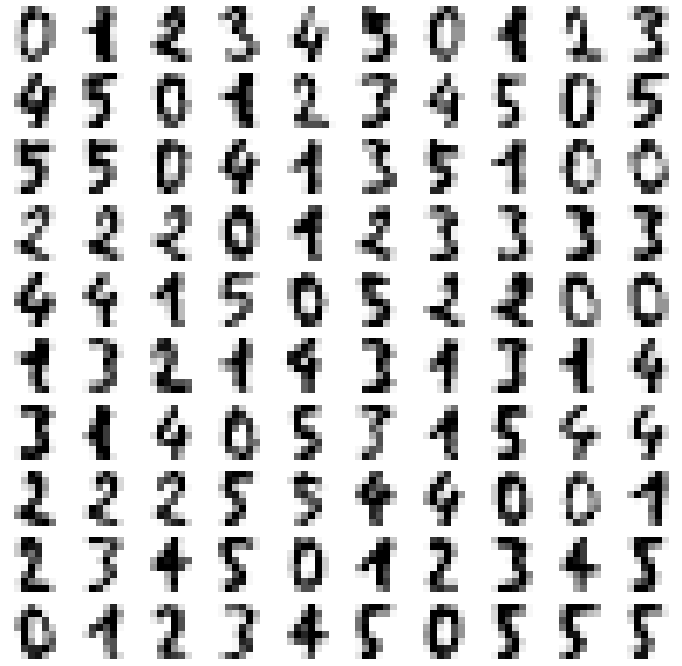

In [4]:
fig, axs = plt.subplots(10, 10, figsize=(12, 12))

for digit, target, ax in zip(digits.data, digits.target, axs.flatten()):
    image = digit.reshape(8, 8)
    ax.imshow(image, cmap=cm.Greys)
    ax.axis('off')

### 2) Scale Data

In [5]:
ss = preprocessing.StandardScaler()

In [6]:
X_centered = ss.fit_transform(digits.data)

## 3) and 4)

In [7]:
pca = decomposition.PCA(n_components=10)
X_pca = pca.fit_transform(X_centered)

In [8]:
def scree_plot(ax, pca, n_components_to_plot=8, title=None):
    """Make a scree plot showing the variance explained (i.e. varaince of the projections) for the principal components in a fit sklearn PCA object.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    pca: sklearn.decomposition.PCA object.
      A fit PCA object.
      
    n_components_to_plot: int
      The number of principal components to display in the skree plot.
      
    title: str
      A title for the skree plot.
    """
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    ax.plot(ind, vals, color='blue')
    ax.scatter(ind, vals, color='blue', s=50)

    for i in range(num_components):
        ax.annotate(r"{:2.2f}%".format(vals[i]), 
                   (ind[i]+0.2, vals[i]+0.005), 
                   va="bottom", 
                   ha="center", 
                   fontsize=12)

    ax.set_xticklabels(ind, fontsize=12)
    ax.set_ylim(0, max(vals) + 0.05)
    ax.set_xlim(0 - 0.45, n_components_to_plot + 0.45)
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=16)

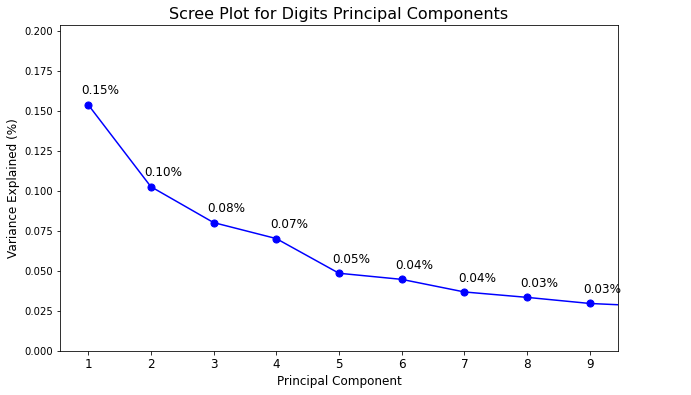

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
scree_plot(ax, pca, title="Scree Plot for Digits Principal Components")

## 5) and 6)

In [10]:
def plot_mnist_embedding(ax, X, y, title=None):
    """Plot an embedding of the mnist dataset onto a plane.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    X: numpy.array, shape (n, 2)
      A two dimensional array containing the coordinates of the embedding.
      
    y: numpy.array
      The labels of the datapoints.  Should be digits.
      
    title: str
      A title for the plot.
    """
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    ax.axis('off')
    ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], 
                 str(digits.target[i]), 
                 color=plt.cm.tab10(y[i] / 10.), 
                 fontdict={'weight': 'bold', 'size': 12})

    ax.set_xticks([]), 
    ax.set_yticks([])
    ax.set_ylim([-0.1,1.1])
    ax.set_xlim([-0.1,1.1])

    if title is not None:
        ax.set_title(title, fontsize=16)

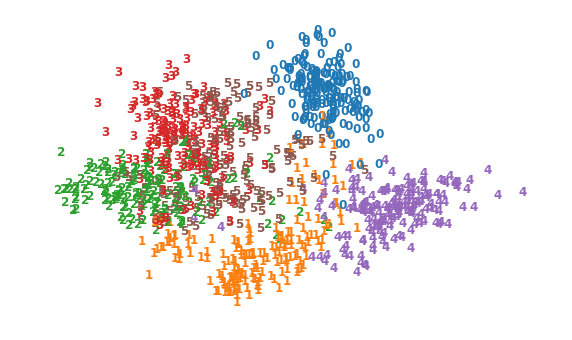

In [11]:
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)


fig, ax = plt.subplots(figsize=(10, 6))
plot_mnist_embedding(ax, X_pca, digits.target)

## PCA: Cars

In [12]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

cars = pd.read_table("data/cars.tsv", header=None)

In [13]:
# expand first column into many
new_df = pd.concat([pd.DataFrame(cars.iloc[:,0].str.split().tolist()), pd.DataFrame(cars.iloc[:,1])], axis=1, ignore_index=True)

In [14]:
# remove problematic rows/columns where there are non-numeric data
car_df = new_df[new_df[3] != '?'].iloc[:,:8]
car_df.head()

,0,1,2,3,4,5,6,7
0,18.0,8,307.0,130.0,3504.,12.0,70,1
1,15.0,8,350.0,165.0,3693.,11.5,70,1
2,18.0,8,318.0,150.0,3436.,11.0,70,1
3,16.0,8,304.0,150.0,3433.,12.0,70,1
4,17.0,8,302.0,140.0,3449.,10.5,70,1


In [15]:
car_df.columns = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model_year', 'origin']

# convert numeric values to numeric datatype
float_df = car_df.apply(pd.to_numeric)
float_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [16]:
from sklearn.preprocessing import scale

multi_regress = float_df.copy()

y = multi_regress.pop('mpg')
features = multi_regress

X = sm.add_constant(features)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 03 Mar 2021   Prob (F-statistic):          2.04e-139
Time:                        10:07:37   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
model_year       0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
import statsmodels.formula.api as smf

est = smf.ols(formula="mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + C(model_year) + C(origin)", data=float_df).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 03 Mar 2021   Prob (F-statistic):          2.64e-151
Time:                        10:07:38   Log-Likelihood:                -954.59
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     369   BIC:                             2047.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              30.9168      2.361     13.095      0.000      26.274      35.559
C(cylinders)[T.4]       6.9399      1.537      4.516      0.000       3.918       9.962
C(cylinders)[T.5]       6.6377      2.337      2.840      0.005       2.042      11.234
C(cylinders)[T.6]       4.2973      1.706      2.519      0.012       0.943       7.652
C(cylinders)[T.8]       6.3668      1.969      3.234      0.001       2.495      10.238
C(model_year)[T.71]     0.9104      0.816      1.116      0.265      -0.693       2.514
C(model_year)[T.72]    -0.4903      0.804     -0.610      0.542      -2.071       1.090
C(model_year)[T.73]    -0.5529      0.721     -0.766      0.444      -1.972       0.866
C(model_year)[T.74]     1.2420      0.855      1.453      0.147      -0.439       2.923
C(model_year)[T.75]     0.8704      0.837      1.039      0.299      -0.776       2.517
C(model_year)[T.76]     1.4967      0.802      1.866      0.063      -0.080       3.074
C(model_year)[T.77]     2.9987      0.820      3.657      0.000       1.386       4.611
C(model_year)[T.78]     2.9738      0.779      3.816      0.000       1.442       4.506
C(model_year)[T.79]     4.8962      0.825      5.936      0.000       3.274       6.518
C(model_year)[T.80]     9.0589      0.875     10.351      0.000       7.338      10.780
C(model_year)[T.81]     6.4582      0.864      7.477      0.000       4.760       8.157
C(model_year)[T.82]     7.8376      0.849      9.228      0.000       6.167       9.508
C(origin)[T.2]          1.6933      0.516      3.280      0.001       0.678       2.708
C(origin)[T.3]          2.2929      0.497      4.616      0.000       1.316       3.270
displacement            0.0118      0.007      1.745      0.082      -0.001       0.025
horsepower             -0.0392      0.013     -3.010      0.003      -0.065      -0.014
weight                 -0.0052      0.001     -8.300      0.000      -0.006      -0.004
acceleration            0.0036      0.087      0.042      0.967      -0.167       0.174
==============================================================================
Omnibus:                       32.560   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.829
Skew:                           0.528   Prob(JB):                     7.53e-13
Kurtosis:                       4.518   Cond. No.                     7.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
multi_regress = float_df.copy()

y = multi_regress.pop('mpg')
y = y.reset_index(drop=True)

pca = decomposition.PCA(n_components=4)
X_pca = pca.fit_transform(scale(multi_regress.as_matrix()))
X_pca

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [21]:
features = pd.DataFrame(X_pca)

X = sm.add_constant(features)
X  =X.reset_index(drop=True)

est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     370.7
Date:                Thu, 07 Mar 2019   Prob (F-statistic):          6.46e-131
Time:                        11:48:38   Log-Likelihood:                -1052.4
No. Observations:                 392   AIC:                             2115.
Df Residuals:                     387   BIC:                             2135.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4459      0.180    130.067      0.000      23.092      23.800
0             -3.0859      0.084    -36.764      0.000      -3.251      -2.921
1             -0.3901      0.186     -2.098      0.037      -0.756      -0.025
2             -2.2701      0.209    -10.864      0.000      -2.681      -1.859
3             -0.7774      0.260     -2.992      0.003      -1.288      -0.267
==============================================================================
Omnibus:                       43.160   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.123
Skew:                           0.601   Prob(JB):                     1.63e-20
Kurtosis:                       5.034   Cond. No.                         3.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

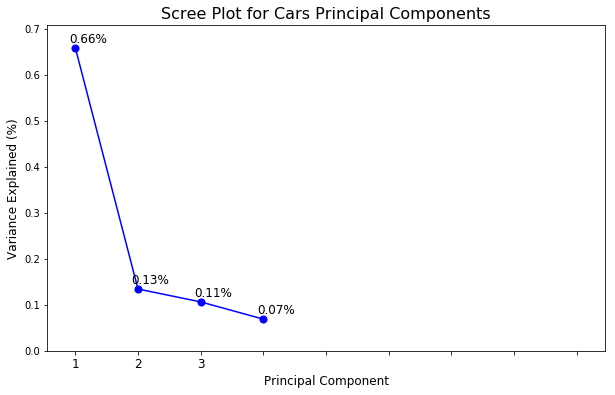

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
scree_plot(ax, pca, title="Scree Plot for Cars Principal Components")

While PCA does not increase our R-squared or Adjusted-R-squared, it does make a model that is potentially more generalizable.  I haven't run a cross validation test on this model, but you may see better performance on unseen data after having first performed Dimensionality Reduction.  Also there is comparable performance of PCA reduced to 4 features and with the model using all the original 7.